# CNN zur Modelerkennung
@Martin Kraus


In [406]:
##eigentliches CNN
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
input_dir = 'C:/Users/Martin/Untitled Folder 1/'

directories = os.listdir(input_dir)


In [407]:
#load preloaded data
images = np.load('X_train.npy') #Saving train image arrays
labels = np.load('Y_train.npy')#Saving train labels)

In [408]:
np.shape(images)
#plt.imshow(images[0])

(995, 32, 32, 3)

In [409]:
np.shape(images)
#test_images= images
#images =np.reshape(test_images, [1007,32,32,3])
#np.shape(test_images)

(995, 32, 32, 3)

In [410]:
#normalise images
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
 # TODO: Implement Function
    x_min = np.min(x)
    x_max = np.max(x)
    return (x - x_min) / (x_max - x_min)  



In [411]:
#normalize images
images = normalize(images)

In [412]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

isEncoded = False
enc = OneHotEncoder()

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    global isEncoded
    
    if not isEncoded:
        enc.fit(x)  
        
        
    return enc.transform(x).toarray()


In [413]:
from sklearn.preprocessing import OneHotEncoder
#enc_2 = OneHotEncoder()
#enc_2.fit(labels)  
#enc_2.transform(labels).toarray()


In [414]:
labels = one_hot_encode(labels)

In [415]:
#randomize data
order_vec = np.array(range(len(images)))
#print(order_vec)
np.random.shuffle(order_vec)
#print(order_vec)

images = images[order_vec]
labels = labels[order_vec]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [416]:
#wähle Daten aus um nicht zu viele bilder mit model zu haben
count = 0

to_check = labels
for i in range(len(to_check)):
    if(to_check[i,0]==1):
        count +=1
print(count)
count_0=0
for i in range(len(to_check)):
    if(to_check[i,0]==0):
        count_0 +=1
print(count_0)

labels_1_index = labels[0:,0]==1
labels_0_index = labels[0:,0]==0




fifty_fifty_bool = True
if fifty_fifty_bool == True:
    test_images_0 = images[labels_0_index]
    test_images_1 = images[labels_1_index][range(count_0)]
    images = np.concatenate([test_images_0, test_images_1], axis=0)
    test_labels_0 = labels[labels_0_index]
    test_labels_1 = labels[labels_1_index][range(count_0)]
    labels = np.concatenate([test_labels_0, test_labels_1], axis=0)


884
111


In [417]:
#randomize data
order_vec = np.array(range(len(images)))
#print(order_vec)
np.random.shuffle(order_vec)
#print(order_vec)

images = images[order_vec]
labels = labels[order_vec]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221]
[220 100  88  26 198  45 106  67 113  58 135 148 173 202  21 133   5 170
 116 121 186 207  17  80 

In [418]:
#split data in validation und train set
train_proportion = 0.8
train_indexes = range(int(train_proportion*len(images)))
val_indexes = range(int(train_proportion*len(images))+1, len(images))
train_images = images[train_indexes]
train_labels = labels[train_indexes]
valid_features = images[val_indexes]
valid_labels = labels[val_indexes]

In [419]:
#baue batches
def get_batches(batch_size):
    batches_images = train_images[range(batch_size)]
    batches_labels = train_labels[range(batch_size)]
    return batches_images, batches_labels

In [420]:
def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    input = tf.placeholder(tf.float32, shape = [None, image_shape[0],image_shape[1],image_shape[2]], name = "x")
    
    return input


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    input = tf.placeholder(tf.float32, shape = [None, n_classes], name = "y")
    #(None, 32, 32, 3))
    return input

def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    input = tf.placeholder(tf.float32,  name = "keep_prob")
    #(None, 32, 32, 3))
    return input


In [421]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1],x_tensor.get_shape().as_list()[3], conv_num_outputs], 
                                             mean =0.0, stddev=0.1))
    #out_height = int(np.ceil(float(x_tensor.get_shape().as_list()[1] - conv_ksize[0] + 1) / float(conv_strides[0]))) 
    #out_width  = int(np.ceil(float(x_tensor.get_shape().as_list()[2] - conv_ksize[1] + 1) / float(conv_strides[1])))
    #print(out_width)
    # weight = tf.Variable(tf.truncated_normal([out_height, out_width,x_tensor.get_shape().as_list()[3], conv_num_outputs], 
    #                                          mean =0.0, stddev=0.1))
    #bias = tf.Variable(tf.random_normal([conv_num_outputs]))
    bias = tf.Variable(tf.zeros([conv_num_outputs]))
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1, pool_ksize[0], pool_ksize[1], 1],
                                strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    
    return conv_layer

def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    new_dimension = x_tensor.get_shape().as_list()[1]*x_tensor.get_shape().as_list()[2]*x_tensor.get_shape().as_list()[3]
    flattened_tensor = tf.reshape(x_tensor,[-1, new_dimension ])
    #print(flattened_tensor.shape)
    return flattened_tensor

def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], mean =0.0,stddev=0.1))
    
    #bias = tf.Variable(tf.random_normal([num_outputs]))
    bias = tf.Variable(tf.zeros([num_outputs]))
    fully_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    fully_layer = tf.nn.relu(fully_layer)
    
    #return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=tf.nn.relu)
    return fully_layer

def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], mean =0.0,stddev=0.1))
    
    #bias = tf.Variable(tf.random_normal([num_outputs]))
    bias = tf.Variable(tf.zeros([num_outputs]))
    out_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    #out_layer = tf.nn.relu(out_layer)
    return out_layer



In [422]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_layer_1 = conv2d_maxpool(x, 64, [4,4], [2,2], [2,2], [2,2])
    #shape 16,16,36
    conv_layer_2 = conv2d_maxpool(conv_layer_1, 128, [4,4], [1,1], [2,2], [2,2])
    #shape  8,8,128
    #conv_layer_3 = conv2d_maxpool(conv_layer_2, 256, [3,3], [1,1], [1,1], [1,1])
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flatten_layer = flatten(conv_layer_2)
    #flatten_layer = tf.nn.dropout(flatten_layer, keep_prob)
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fully_con_layer_1 = fully_conn(flatten_layer, 100)
    fully_con_layer_1 = tf.nn.dropout(fully_con_layer_1, keep_prob)
    fully_con_layer_2 = fully_conn(fully_con_layer_1, 50)
    fully_con_layer_2 = tf.nn.dropout(fully_con_layer_2, keep_prob)
    #fully_con_layer_3 = fully_conn(fully_con_layer_2, 50)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    output_layer = output(fully_con_layer_2, nr_of_labels)
    
    # TODO: return output
    return output_layer



In [423]:
nr_of_labels =2

In [424]:
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(2)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


In [425]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
   
    pass
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    valid_acc = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    print('Loss at {}'.format(loss), 'Validation Accuracy at {}'.format(valid_acc))
   

In [426]:
# TODO: Tune Parameters
epochs = 50
batch_size = 128
keep_probability = 0.6

In [427]:
count = 0

to_check = valid_labels
for i in range(len(to_check)):
    if(to_check[i,0]==1):
        count +=1
        
print(count/len(to_check))

0.5454545454545454


In [428]:
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        batch_features, batch_labels = get_batches(batch_size)
        train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, Witt-Model-classifier Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss at 1.078268051147461 Validation Accuracy at 0.4545454680919647
Epoch  2, CIFAR-10 Batch 1:  Loss at 0.6226668357849121 Validation Accuracy at 0.47727271914482117
Epoch  3, CIFAR-10 Batch 1:  Loss at 0.6590913534164429 Validation Accuracy at 0.5909090638160706
Epoch  4, CIFAR-10 Batch 1:  Loss at 0.6290079355239868 Validation Accuracy at 0.6136363744735718
Epoch  5, CIFAR-10 Batch 1:  Loss at 0.612542986869812 Validation Accuracy at 0.9545454382896423
Epoch  6, CIFAR-10 Batch 1:  Loss at 0.6091745495796204 Validation Accuracy at 0.6363636255264282
Epoch  7, CIFAR-10 Batch 1:  Loss at 0.596767008304596 Validation Accuracy at 0.8863636255264282
Epoch  8, CIFAR-10 Batch 1:  Loss at 0.5900323987007141 Validation Accuracy at 0.9318181872367859
Epoch  9, CIFAR-10 Batch 1:  Loss at 0.5845392942428589 Validation Accuracy at 0.9090909361839294
Epoch 10, CIFAR-10 Batch 1:  Loss at 0.5782239437103271 Validation Accuracy a

In [429]:
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        batch_i = 1
        batch_features, batch_labels = get_batches(batch_size)
        train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, witt-model-classifier Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss at 0.6586146354675293 Validation Accuracy at 0.5454545617103577
Epoch  2, CIFAR-10 Batch 1:  Loss at 0.6274292469024658 Validation Accuracy at 0.7045454382896423
Epoch  3, CIFAR-10 Batch 1:  Loss at 0.6202279329299927 Validation Accuracy at 0.8636363744735718
Epoch  4, CIFAR-10 Batch 1:  Loss at 0.6039412021636963 Validation Accuracy at 0.7272727489471436
Epoch  5, CIFAR-10 Batch 1:  Loss at 0.5702357292175293 Validation Accuracy at 0.9090909361839294
Epoch  6, CIFAR-10 Batch 1:  Loss at 0.5655685663223267 Validation Accuracy at 0.6818181872367859
Epoch  7, CIFAR-10 Batch 1:  Loss at 0.526997447013855 Validation Accuracy at 0.75
Epoch  8, CIFAR-10 Batch 1:  Loss at 0.4871102571487427 Validation Accuracy at 0.9545454382896423
Epoch  9, CIFAR-10 Batch 1:  Loss at 0.4516737461090088 Validation Accuracy at 0.9090909361839294
Epoch 10, CIFAR-10 Batch 1:  Loss at 0.43324145674705505 Validation Accuracy at 0.9545454382896423
Epoch 11, CIFAR-10 Bat

In [463]:
def display_image_predictions(features, labels, predictions):
    n_classes = nr_of_labels
    label_names = [0,1]
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    nr_of_test_images = len(labels)
    fig, axies = plt.subplots(nrows=nr_of_test_images, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 2
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.9545454382896423

44


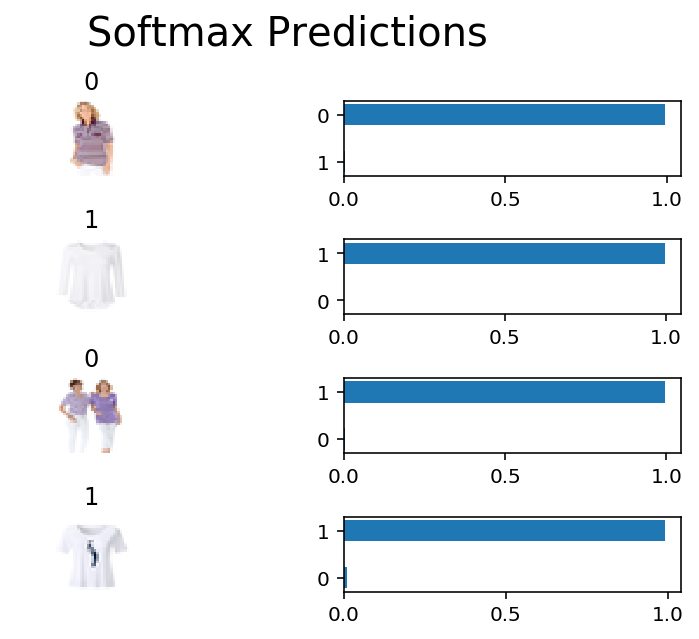

In [476]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
#import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 2

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = valid_features, valid_labels
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        train_feature_batch, train_label_batch = test_features, test_labels
        test_batch_acc_total += sess.run(
            loaded_acc,
            feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
        test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))
        print(len(test_features))
        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

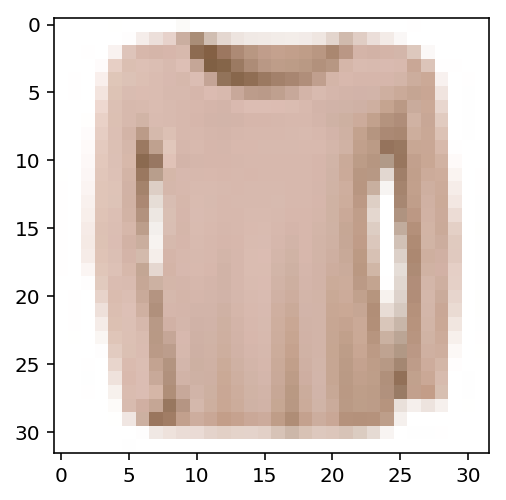

In [403]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.imshow(batch_features[3,]) 


In [78]:
np.shape(labels)

(1007, 1)